Logistic回归模型 (线性可分)
====

# 简介

预测一个学生是否被大学录取。假设你是大学某个院系的管理员，你想通过申请人在两门考试中的表现来决定每个人的录取率，你有来自以前申请人的历史数据，你可以用这些数据作为训练集建立Logistic回归，对每一个训练样本，你有申请人在两门考试中的分数和录取决定。

**目标:**
建立一个分类模型，基于这两门课的分数来估计申请人的录取概率。


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=4, floatmode='fixed')

## 全局设置
plt.rcParams['figure.figsize']=(16, 8)
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False


In [17]:
# numpy way
# data = np.loadtxt('ex2data1.txt', delimiter=',')

data = pd.read_csv('ex2data1.txt', names = ['Exam1','Exam2','Accepted'])


# 原始数据

In [18]:
data[:10]


,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [19]:
data.shape


(100, 3)

Plotting data with + indicating (y = 1) examples and o indicatig (y = 0) examples.



<AxesSubplot:xlabel='Exam 1 score', ylabel='Exam 2 score'>

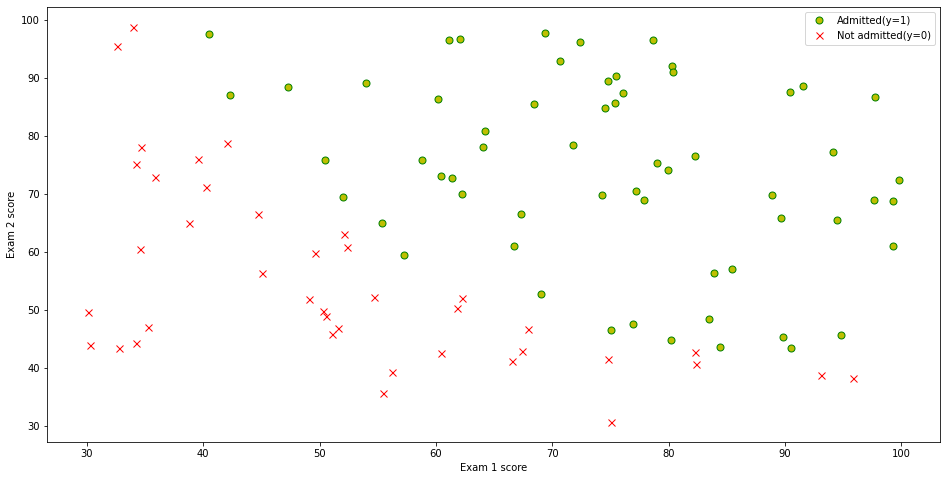

In [20]:
def plotData(data):
    _X = data.iloc[:, :-1]
    _y = data.iloc[:, -1:]
    pos = _X[_y['Accepted'] == 1]
    neg = _X[_y['Accepted'] == 0]

    print('Plotting data with + indicating (y = 1) examples and o indicatig (y = 0) examples.\n')
    fig, ax = plt.subplots()
    ax.plot(pos['Exam1'], pos['Exam2'], 'go', markersize=7, markerfacecolor='y', label='Admitted(y=1)')
    ax.plot(neg['Exam1'], neg['Exam2'], 'rx', markersize=7, linewidth='2', label='Not admitted(y=0)')
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    ax.legend()

    return ax

plotData(data)


# 构建训练集

In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

m, n = X.shape  # m 行样本, n 列特征
X = np.c_[np.ones(m), X]  # 在 X 前加一列 1, 作为偏置(bias, 即theta 0)的x值
y = y.values
initial_theta = np.zeros((X.shape[1], 1))  # 特征向量

print(X.shape, y.shape, initial_theta.shape)
print(X[:10])


(100, 3) (100, 1) (3, 1)
[[ 1.0000 34.6237 78.0247]
 [ 1.0000 30.2867 43.8950]
 [ 1.0000 35.8474 72.9022]
 [ 1.0000 60.1826 86.3086]
 [ 1.0000 79.0327 75.3444]
 [ 1.0000 45.0833 56.3164]
 [ 1.0000 61.1067 96.5114]
 [ 1.0000 75.0247 46.5540]
 [ 1.0000 76.0988 87.4206]
 [ 1.0000 84.4328 43.5334]]


# 代价和梯度函数

In [22]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def computeCost(X, y, theta):
    '''
    COMPUTECOST Compute cost for linear regression:
        J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
        parameter for linear regression to fit the data points in X and y
    '''
    m = len(y) # number of training examples
    h = sigmoid(X @ theta) # hypothesis function
    J = -np.sum(y * np.log(h) + (1-y)*np.log(1-h))/m
    grad = X.T @ (h-y) / m
    return J, grad


In [23]:
# compute and display initial cost
print('\nTesting the cost function ...\n')
cost, grad = computeCost(X, y, initial_theta)
print(f'Cost at initial theta (zeros): {cost}\n')
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(f'{grad} \n')
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')



Testing the cost function ...

Cost at initial theta (zeros): 0.6931471805599453

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1000]
 [-12.0092]
 [-11.2628]] 

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [24]:
np.set_printoptions(precision=3)

# Compute and display cost and gradient with non-zero theta
test_theta = [[-24], [0.2], [0.2]]
cost, grad = computeCost(X, y, test_theta)
print(f'\nCost at test theta: {cost}\n')
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print(f' {grad} \n')
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')



Cost at test theta: 0.21833019382659782

Expected cost (approx): 0.218

Gradient at test theta: 

 [[0.043]
 [2.566]
 [2.647]] 

Expected gradients (approx):
 0.043
 2.566
 2.647



# 梯度下降算法

## gradientDescent 自己实现的版本

自己实现的梯度下降算法效果不是很理想

可以多尝试几次用不同的学习率 alpha 和 迭代次数, 我最后看到 alpha = 0.004, iterations = 300000 效果比较接近课程切勿的代价值 和 theta, 但计算速度很慢.

In [25]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    GRADIENTDESCENT Performs gradient descent to learn theta
        theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by
        taking num_iters gradient steps with learning rate alpha
    '''
    J_history = []
    for i in range(num_iters):
        J, grad = computeCost(X, y, theta)
        theta -= alpha * grad
        J_history.append(J)
    return theta, J_history


iterations = 300000
alpha = 0.004
initial_theta = np.zeros((X.shape[1], 1))

print('\nRunning Gradient Descent ...\n')
final_theta, J_history = gradientDescent(X, y, initial_theta, alpha, iterations)

print(f'Cost at theta found by gradient descent: {J_history[-1]}')
print('Expected cost (approx): 0.203')
print('Theta found by gradient descent:')
print(final_theta)
print('''\
Expected theta values (approx)
  -25.161
    0.206
    0.201
''')



Running Gradient Descent ...

Cost at theta found by gradient descent: 0.20367564136975919
Expected cost (approx): 0.203
Theta found by gradient descent:
[[-24.088]
 [  0.198]
 [  0.193]]
Expected theta values (approx)
  -25.161
    0.206
    0.201



## 利用三方库的优化器

### scipy.optimize.fmin_tnc
课程里推荐使用 Octave 的内置函数 `fminunc`. 

用python 实现的话, 我们可以使用`scipy.optimize` 库里较为常用的`fmin_tnc`函数, truncated Newton (TNC) algorithm

速度非常快 :-)

`scipy.optimize` 还提供了其他不同梯度下降算法的优化器:
| function | description | 
| -------- | ----------- |
| `fmin(func, x0[, args, xtol, ftol, maxiter, …])` | Minimize a function using the downhill simplex algorithm. |
| `fmin_powell(func, x0[, args, xtol, ftol, …])` | Minimize a function using modified Powell’s method. |
| `fmin_cg(f, x0[, fprime, args, gtol, norm, …])` | Minimize a function using a nonlinear conjugate gradient algorithm. |
| `fmin_bfgs(f, x0[, fprime, args, gtol, norm, …])` | Minimize a function using the BFGS algorithm. |
| `fmin_ncg(f, x0, fprime[, fhess_p, fhess, …])` | Unconstrained minimization of a function using the Newton-CG method. |
| `fmin_l_bfgs_b(func, x0[, fprime, args, …])` | Minimize a function func using the L-BFGS-B algorithm. |
| `fmin_tnc(func, x0[, fprime, args, …])` | Minimize a function with variables subject to bounds, using gradient information in a truncated Newton algorithm. |
| `fmin_cobyla(func, x0, cons[, args, …])` | Minimize a function using the Constrained Optimization By Linear Approximation (COBYLA) method. |
| `fmin_slsqp(func, x0[, eqcons, f_eqcons, …])` | Minimize a function using Sequential Least Squares Programming |

In [26]:
from scipy.optimize import fmin_tnc

def computeCost_new(theta, X, y):
    '''
    因为cost函数在被fmin_tnc调用的时候,传进来的theta会变成一维数组,
    然后就会报错tnc: gradient must have shape (len(x0),)
    所以要把theta变为向量, 可以用reshape, 也可以添加维度
    '''
    # theta = theta.reshape((theta.shape[0],1))
    theta = theta[:, np.newaxis] # 同上
    m = len(y) # number of training examples
    h = sigmoid(X @ theta) # hypothesis function
    J = -np.sum(y * np.log(h) + (1-y)*np.log(1-h))/m
    grad = X.T @ (h-y) / m
    return J, grad


result = fmin_tnc(func=computeCost_new, x0=initial_theta, args=(X, y))
print(result)
final_theta = result[0][:, np.newaxis] # 这里 fmin_tnc 返回的theta 是一维数组

print('Theta found by fmin_tnc:')
print(final_theta)
print('''\
Expected theta values (approx)
  -25.161
    0.206
    0.201
''')


(array([-25.163,   0.206,   0.201]), 11, 1)
Theta found by fmin_tnc:
[[-25.163]
 [  0.206]
 [  0.201]]
Expected theta values (approx)
  -25.161
    0.206
    0.201



### scipy.optimize.minimize

`minimize` 是更为底层的函数, 我们可以设置不同的梯度下降算法.

`minimize` 要求损失函数和梯度函数分别作为参数传入, 所以下面我们分别创建了两个函数: `calcCost(theta, X, y)` 和 `calcGrad(theta, X, y)`


In [36]:
from scipy.optimize import minimize

def calcCost(theta, X, y):
    '''
    计算损失值

    因为cost函数在被优化器调用的时候,传进来的theta会变成一维数组,
    然后就会报错tnc: gradient must have shape (len(x0),)
    所以要把theta变为向量, 可以用reshape, 也可以添加维度
    '''
    # theta = theta.reshape((theta.shape[0],1))
    theta = theta[:, np.newaxis] # 同上
    m = len(y) # number of training examples
    h = sigmoid(X @ theta) # hypothesis function
    J = -np.sum(y * np.log(h) + (1-y)*np.log(1-h))/m
    return J

def calcGrad(theta, X, y):
    '''
    计算梯度

    因为cost函数在被优化器调用的时候,传进来的theta会变成一维数组,
    然后就会报错tnc: gradient must have shape (len(x0),)
    所以要把theta变为向量, 可以用reshape, 也可以添加维度
    '''
    # theta = theta.reshape((theta.shape[0],1))
    theta = theta[:, np.newaxis] # 同上
    m = len(y) # number of training examples
    h = sigmoid(X @ theta) # hypothesis function
    grad = X.T @ (h-y) / m
    return grad


result = minimize(fun = calcCost,
                  x0 = initial_theta,
                  args = (X, y),
                  method = 'TNC',  # truncated Newton (TNC) algorithm
                  jac = calcGrad
                  )
print(result) # 返回字典, 'fun': 损失值, 'x': theta,  'vfev': 调用次数 ...
final_theta = result['x'][:, np.newaxis] # 优化器返回的theta 是一维数组

print('Theta found by fmin_tnc:')
print(final_theta)
print('''\
Expected theta values (approx)
  -25.161
    0.206
    0.201
''')


     fun: 0.20349770225975955
     jac: array([[-0.000],
       [-0.000],
       [ 0.000]])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 11
     nit: 5
  status: 1
 success: True
       x: array([-25.163,   0.206,   0.201])
Theta found by fmin_tnc:
[[-25.163]
 [  0.206]
 [  0.201]]
Expected theta values (approx)
  -25.161
    0.206
    0.201



# 训练集准确率

In [27]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    y_pred = np.int64(prob >= 0.5)
    return y_pred


prob = sigmoid([1, 45, 85] @ final_theta)

print(f'For a student with scores 45 and 85, we predict an admission probability of {prob}')
print('Expected value: 0.775 +/- 0.002')

# Compute accuracy on our training set
p = predict(X, final_theta)

print(f'Train Accuracy: {np.mean(p == y) * 100}')
print('Expected accuracy (approx): 89.0')


For a student with scores 45 and 85, we predict an admission probability of [0.776]
Expected value: 0.775 +/- 0.002
Train Accuracy: 89.0
Expected accuracy (approx): 89.0


# 决策边界

决策边界就是 $ sigmoid(Xθ)=0.5$ 处, 即$Xθ=0$的时候

由 $ Xθ = 0 $ 得:

$ \theta_0 + \theta_1*x_1 + \theta_2*x_2 = 0 $


所以:

$x_2 = -θ_0/θ_2 - θ_1/θ_2 * x_1$


Plotting data with + indicating (y = 1) examples and o indicatig (y = 0) examples.



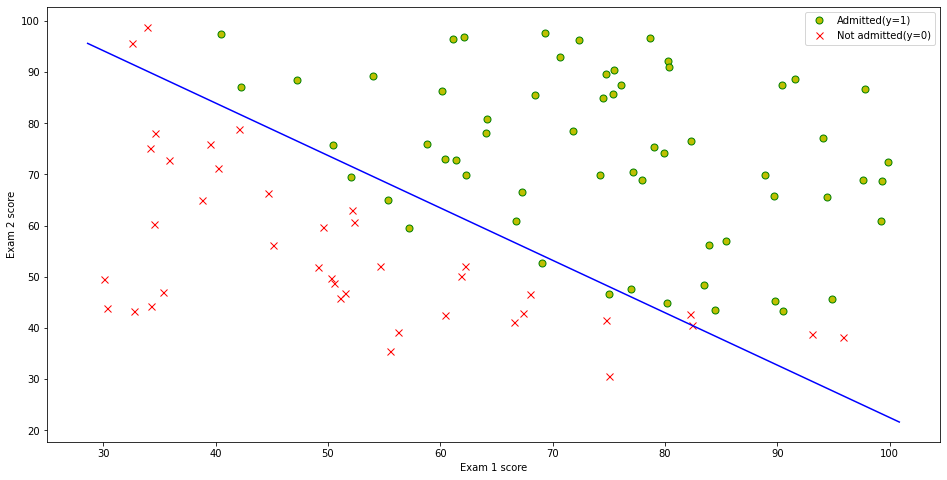

In [28]:
coef1 = - final_theta[0] / final_theta[2]
coef2 = - final_theta[1] / final_theta[2]
x = [np.min(X[:, 2])-2, np.max(X[:, 2])+2] # 取左右两个端点即可
f = coef1 + coef2 * x
ax = plotData(data)   # 画原始数据
ax.plot(x, f, c='b')  # 画边界线
plt.show()
